In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer #etiketleri one-hot encoding formatına dönüştürmek için
from sklearn.preprocessing import StandardScaler #verileri standartlaştırmak için

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Layer,Flatten
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam


In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
#one-hot encoding
label_binarizer = LabelBinarizer() # one-hot encoding formatına dönuşturen nesne
y_encoded = label_binarizer.fit_transform(y)

In [4]:
#standardizasyon
scaler = StandardScaler() # veriyi standartlaştırmak için nesne tanımla
X_scaled = scaler.fit_transform(X)

In [5]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42)

In [9]:
class RBFLayer(Layer): # RBFLayer, Keras'ın layer sınıfından miras(inheritance) alır

  def __init__(self, units, gamma, **kwargs):
    """
    constructor,
    katmanın genel özelliklerini baslatmak için gereklidir
    """
    super(RBFLayer, self).__init__(**kwargs) # layer sınıfının init metodu çağırılır, katmanların genel özelliklerini ...
    self.units = units#rbf katmanında gizli nöron sayısı
    self.gamma = K.cast_to_floatx(gamma)# rbf fonksiyonu ayilim parametresi, rbf duyarlılığı


  def build(self, input_shape):
    """
    build metodu katmanın ağırlıklarını tanımlar
    bu method, keras tarafından katman ilk defa bir input alındığında otomatik olarak çağrılır
    """
    #add_weight= kerasta eğitilebilecek ağırıkları tanımlamak için kullanılır
    self.mu = self.add_weight(name='mu',
                              shape=(int(input_shape[1]), self.units),#shape = ağırlıkların boyutunu tanımlar
                              initializer='uniform',#ağırlıkların başlangıç değerini belirler
                              trainable=True)# apırlıklar eğitilebilir
    super(RBFLayer, self).build(input_shape)# laeyr sınıfının build metodu cağrılarak katmanın inşası tamamlanır


  def call(self,inputs):
    """
    katman çağrıldığında (yani forward propagation sırasında) calışır,
    bu fonksiyon girdiyi alır, çıktıyı hesaplar
    """
    # inputlar ve merkezler arasındaki fark hesaplanır
    diff = K.expand_dims(inputs)-self.mu # K.expand_dims(inputs):girdiye bir boyut ekler

    l2 = K.sum(K.pow(diff,2),axis=1) # K.pow(diff,2): diff'in karesi , K.sum():farkların toplamını alır

    #l2 mesafesinin gamma ile çarpılması ve negatif üstel bir fonksiyonun alınması rbf değerini öretir
    res = K.exp(-1*self.gamma*l2)#K.exp: rgf = exp(-gmama*l2)

    return res


  def compute_output_shape(self,input_shape):
    """
    bu method katmanın çıkış şekli hakkında bilgi verir
    keras yardımcı fonksiyonlarından bir tanesidir
    """
    return (input_shape[0],self.units) # çıktının şekli (num_samples,num_units)  input_shape[0]:sample sayısı

In [10]:
# build, compile and train

def build_model():
  model=Sequential()
  model.add(Flatten(input_shape=(4,))) # giriş verisini düzleştir
  model.add(RBFLayer(units=10,gamma=0.5)) # rbf katmanını ekle 10 nöron gamma=0.5
  model.add(Dense(3,activation='softmax'))# output katmanı 3 (sınıf sayısı>2) sınıf olduğu için softmax

  # compile
  model.compile(
      optimizer="adam",
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  return model

# model oluşturma
model = build_model()

history = model.fit(X_train, y_train,
                    epochs=250, batch_size=16,
                    validation_split=0.3,
                    verbose=1)


Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.2967 - loss: 0.9961 - val_accuracy: 0.3889 - val_loss: 0.8924
Epoch 2/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3677 - loss: 0.9563 - val_accuracy: 0.3889 - val_loss: 0.8870
Epoch 3/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.3599 - loss: 0.9738 - val_accuracy: 0.3889 - val_loss: 0.8820
Epoch 4/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3855 - loss: 0.9495 - val_accuracy: 0.4167 - val_loss: 0.8772
Epoch 5/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3959 - loss: 0.9571 - val_accuracy: 0.4444 - val_loss: 0.8727
Epoch 6/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4239 - loss: 0.9137 - val_accuracy: 0.4444 - val_loss: 0.8683
Epoch 7/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4012 - loss: 0.9664 - val_accuracy: 0.4444 - val_loss: 0.8643
Epoch 8/250
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3614 - loss: 0.9782 - val_accuracy: 0.4444 - val_loss: 0.8603
Epoc

In [11]:
# test veri seti ile test
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9333 - loss: 0.2149
Test Loss: 0.2149
Test Accuracy: 93.33%


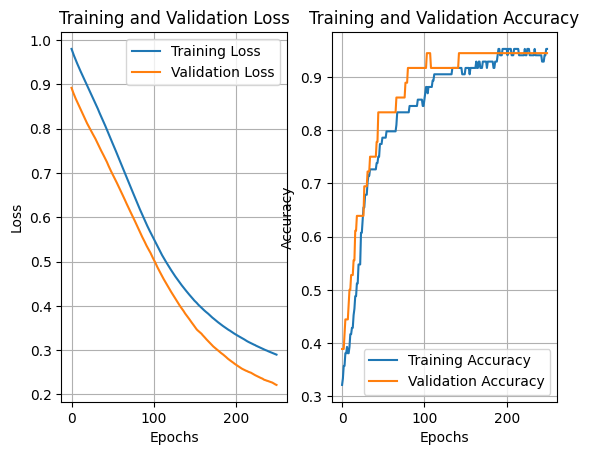

In [13]:
# history: loss ve accuracy visualization
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.show()